In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#### About Dataset

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [2]:
# Loading the dataset into pandas dataframe
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking the no of missing values in each column

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

### Distribution of Legit and Fraudlent transaction

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

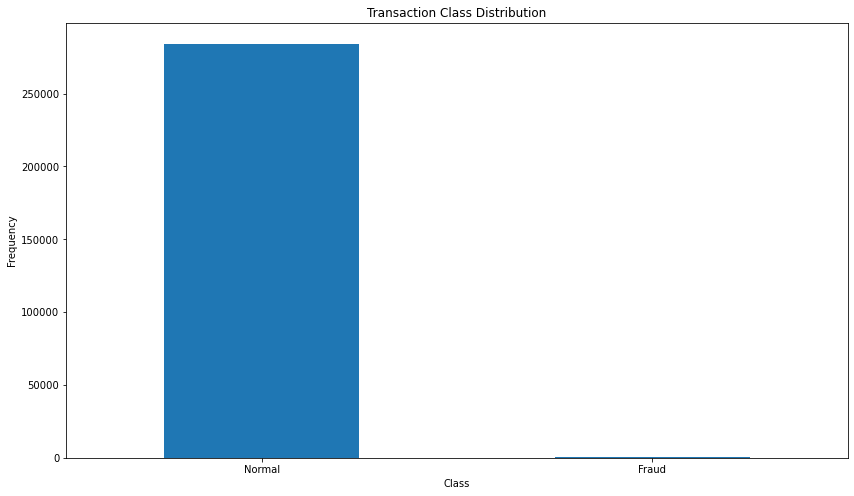

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

### Seperating the data for Analysis

In [9]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [10]:
legit.shape

(284315, 31)

In [11]:
fraud.shape

(492, 31)

### statistical measures of the data

In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

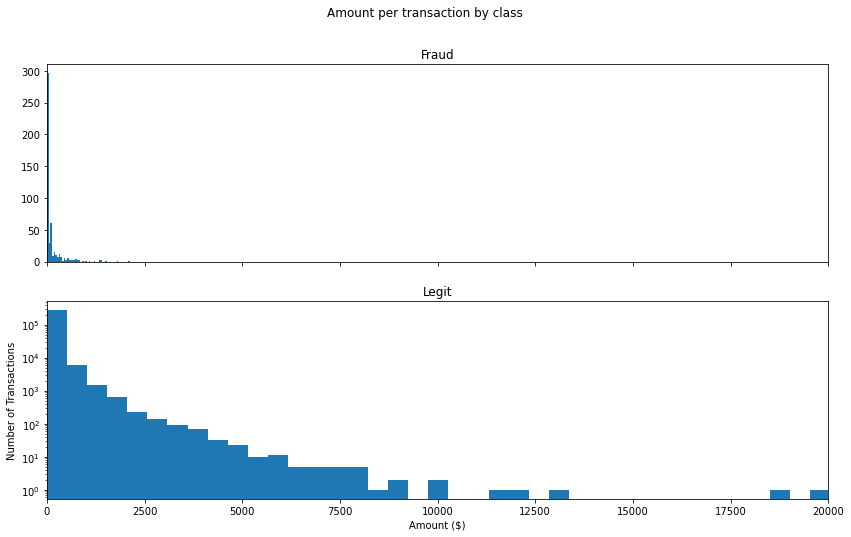

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Undersampling

### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#### Number of Fraudulent Transactions --> 492



In [16]:
new_legit = legit.sample(n=492)

In [17]:
new_legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235350,148351.0,-0.933214,-0.183960,1.475526,-1.821935,1.829929,4.968612,-0.753672,1.490151,1.122410,...,-0.123996,-0.141233,-0.305431,0.762064,0.491146,0.631473,0.044091,0.050076,25.43,0
248795,154098.0,-0.042020,0.568480,-0.242780,-0.359222,0.987981,-0.796675,1.072072,-0.226657,0.002090,...,0.323301,1.016791,-0.215285,-0.517616,-0.568730,-0.177345,0.037690,0.007125,37.33,0
1633,1264.0,-0.442792,0.626260,2.053302,1.181479,-0.556878,-0.236827,0.489551,0.095944,-0.771289,...,-0.000701,-0.296692,0.203856,0.371171,-0.431151,0.744241,-0.061864,0.032084,85.79,0
252966,156038.0,-6.300523,4.233761,-3.083511,-0.705270,-3.804241,-0.746635,-3.322225,4.591197,0.243027,...,0.381588,0.631573,0.183921,-0.001774,0.531351,0.675954,0.096818,-0.004317,12.90,0
97610,66296.0,-1.622251,2.257879,0.016618,1.589634,-1.721856,1.773535,-4.245506,-10.519861,-1.268709,...,-5.143928,1.316616,0.222750,0.327744,0.278374,-0.354858,0.149153,0.322394,150.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111449,72235.0,-0.691845,1.181420,0.376367,0.814933,0.780534,1.319054,0.123975,0.788804,-0.616170,...,-0.049942,0.056650,-0.319763,-1.684882,0.137173,-0.132162,0.298875,0.108435,12.60,0
172111,120965.0,-1.444127,1.531793,-0.735938,-2.906372,0.805237,-0.268813,0.507336,0.856706,-0.424223,...,-0.239993,-0.843656,-0.122249,-0.320501,0.176895,0.390503,0.081332,0.085753,4.00,0
273066,165405.0,2.114637,-0.211168,-1.638108,-0.010894,0.490466,-0.130107,-0.015770,-0.042934,0.528540,...,-0.339011,-0.921378,0.170633,-1.413620,-0.180180,0.266670,-0.082983,-0.086125,1.98,0
147386,88491.0,-0.317218,1.115974,-0.073668,-0.550571,0.139219,-1.073594,0.693343,0.220264,-0.278568,...,-0.202685,-0.526014,0.146392,-0.010862,-0.462895,0.144237,0.124826,0.035393,11.99,0


In [18]:
new_df = pd.concat([new_legit,fraud], axis=0)

In [19]:
new_df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157918,110617.0,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,...,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,635.10,1
18466,29526.0,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,-2.783011,...,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,0.68,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
46626,42861.0,1.241464,-0.696494,0.805999,-0.797892,-1.064489,-0.045467,-0.902002,0.124246,-0.938736,...,0.188070,0.408451,0.043571,0.047318,0.166891,-0.327605,0.037149,0.019619,41.50,0
119409,75436.0,-0.834719,0.734127,2.156400,-0.849955,0.168538,0.644313,0.130166,0.362142,-0.014762,...,0.074248,0.408717,-0.530417,-0.770013,0.545690,0.564007,0.266578,0.105330,3.00,0
123238,76857.0,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,0.248835,...,-0.387895,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,1.00,1


In [20]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96962.174797,0.076986,0.026742,-0.017683,-0.068776,0.010614,0.076143,0.080047,0.060215,0.012782,...,0.011344,0.000032,-0.037529,0.008683,0.056579,-0.006059,-0.029458,-0.015412,0.017659,94.403049
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into features and targets

In [22]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
235350  148351.0 -0.933214 -0.183960  1.475526 -1.821935  1.829929  4.968612   
248795  154098.0 -0.042020  0.568480 -0.242780 -0.359222  0.987981 -0.796675   
1633      1264.0 -0.442792  0.626260  2.053302  1.181479 -0.556878 -0.236827   
252966  156038.0 -6.300523  4.233761 -3.083511 -0.705270 -3.804241 -0.746635   
97610    66296.0 -1.622251  2.257879  0.016618  1.589634 -1.721856  1.773535   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7         V8        V9  

In [24]:
print(Y)

235350    0
248795    0
1633      0
252966    0
97610     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Splitting the data into Training and Testing set

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training Using LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation
#### Accuracy Score

In [29]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9542566709021602


In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234


# Model Training Using RandomForest

In [33]:
clf = RandomForestClassifier()

In [34]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

#### Model Evaluation
#### Accuracy score

In [35]:
# accuracy on training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [46]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


# Model Training Using Support Vector Machine

In [40]:
svc = SVC()

In [41]:
svc.fit(X_train,Y_train)

SVC()

#### Model evaluation
#### Accuracy Score

In [42]:
# accuracy on training data
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5527318932655655


In [44]:
# accuracy on test data
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.5482233502538071
